In [55]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt

In [46]:
# Function for Gaussian filtering
def DO_FILTERING(IMAGE):
    IMAGE_N,IMAGE_M=IMAGE.shape
    # Created Gaussian mask and its related values
    GAUSSIAN_MASK=np.array([[1,1,2,2,2,1,1],[1,2,2,4,2,2,1],[2,2,4,8,4,2,2],[2,4,8,16,8,4,2],[2,2,4,8,4,2,2],[1,2,2,4,2,2,1],[1,1,2,2,2,1,1]])
    MASK_N,MASK_M=GAUSSIAN_MASK.shape
    Center_value_N=int(np.ceil(MASK_N/2))
    Center_value_M=int(np.ceil(MASK_M/2))
    TO_N=Center_value_N-1
    TO_M=Center_value_M-1
    Normalize=np.sum(GAUSSIAN_MASK)
  
    #created a matrix to store output of Gaussian Filtering
    AFTER_GSMOOTHING_IMAGE= np.zeros((IMAGE_N,IMAGE_M),dtype=np.float)
  
    for i in range(IMAGE_N):
        for j in range(IMAGE_M):
            #To set value in which mask goes outside the boudary to undefined/0
            if(i<TO_N or j<TO_M):
                AFTER_GSMOOTHING_IMAGE[i][j]=0
               # continue
            elif(i<TO_N or j>(IMAGE_M-Center_value_M)):
                AFTER_GSMOOTHING_IMAGE[i][j]=0
                #continue
            elif(i>(IMAGE_N-Center_value_N) or j<TO_M):
                AFTER_GSMOOTHING_IMAGE[i][j]=0
                #continue
            elif(i>(IMAGE_N-Center_value_N) or j>(IMAGE_M-Center_value_M)):
                AFTER_GSMOOTHING_IMAGE[i][j]=0
                #continue
            else:    
            #For masking
                set=0
                I_TEMP=i-TO_N
                J_TEMP=j-TO_M

                for i1 in range(MASK_N):
                    J_TEMP=j-TO_M
                    for j1 in range(MASK_M):
                        set+=(GAUSSIAN_MASK[i1][j1])*(IMAGE[I_TEMP][J_TEMP])
                        J_TEMP+=1
                    I_TEMP+=1
                AFTER_GSMOOTHING_IMAGE[i][j]=set/Normalize
               

    print("--------Image after Gaussian flitering--------")
    plt.imshow(AFTER_GSMOOTHING_IMAGE, cmap='gray')
    plt.show()

    cv2.imwrite('AFTER_GSMOOTHING_IMAGE.bmp',AFTER_GSMOOTHING_IMAGE)
    return AFTER_GSMOOTHING_IMAGE

In [47]:
# Function for computing PERWITT GX and GY OPERATION 
def DO_PERWITT_OPERATION(AFTER_GSMOOTHING_IMAGE,IMAGE):
    
   
    
    #for setting value of image from where to start masking
    #Normalize=np.sum(GAUSSIAN_MASK)
    IMAGE_N,IMAGE_M=IMAGE.shape
    #IMAGE
    START_I=4
    END_I=IMAGE_N-START_I
    START_J=4
    #START_J=Center_value_PREWITTM-1
    END_J=IMAGE_M-START_J
    
    #Creating mask for GX and its related value
    PREWITT_GX=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    GX_N,GX_M=PREWITT_GX.shape   
    Center_value_PREWITTN=int(np.ceil(GX_N/2))
    Center_value_PREWITTM=int(np.ceil(GX_M/2))
    TO_PREWITTN=Center_value_PREWITTN-1
    TO_PREWITTM=Center_value_PREWITTM-1
    GX= np.zeros((IMAGE_N,IMAGE_M),dtype=np.float)

    #Creating mask for GY and its related value
    PREWITT_GY=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    GY_N,GY_M=PREWITT_GY.shape    
    GY_Center_value_PREWITTN=int(np.ceil(GY_N/2))
    GY_Center_value_PREWITTM=int(np.ceil(GY_M/2))
    GY_TO_PREWITTN=GY_Center_value_PREWITTN-1
    GY_TO_PREWITTM=GY_Center_value_PREWITTM-1
    GY= np.zeros((IMAGE_N,IMAGE_M),dtype=np.float)

    for I in range(4,IMAGE_N-4):
        for J in range(4,IMAGE_M-4):
                setX=0
                setY=0
                I_TEMP=I-TO_PREWITTN
                J_TEMP=J-TO_PREWITTM

                for i1 in range(GX_N):
                    J_TEMP=J-TO_PREWITTM
                    for j1 in range(GX_M):
                        
                        setX+=(PREWITT_GX[i1][j1])*(AFTER_GSMOOTHING_IMAGE[I_TEMP][J_TEMP])
                        setY+=(PREWITT_GY[i1][j1])*(AFTER_GSMOOTHING_IMAGE[I_TEMP][J_TEMP])
                        
                        J_TEMP+=1
                    I_TEMP+=1
                GX[I][J]=setX
                GY[I][J]=setY
                

    GX_NORMALIZED=np.abs(GX)/3 # Normalizing GX matrix
    GY_NORMALIZED=np.abs(GY)/3 # Normalizing GY matrix
    
    print("--------Normalized Image after GX operation--------")
    plt.imshow(GX_NORMALIZED, cmap='gray')
    plt.show()
    cv2.imwrite('GX_Normalized_Image.bmp',GX_NORMALIZED)
    print("--------Normalized Image after GY operation--------")
    plt.imshow(GY_NORMALIZED, cmap='gray')
    plt.show()
    cv2.imwrite('GY_Normalized_Image.bmp',GY_NORMALIZED)
    return GX,GY,GX_NORMALIZED,GY_NORMALIZED

In [48]:
# Function for computing Prewitt's MAGNITUTE
def COMPUTE_MAGNITUDE(IMAGE,GX_NORMALIZED,GY_NORMALIZED):
    IMAGE_N,IMAGE_M=IMAGE.shape
    MAGNITUDE=np.zeros((IMAGE_N,IMAGE_M),dtype=np.float) 
    
    for i in range(IMAGE_N):
        for j in range(IMAGE_M):
            MAGNITUDE[i][j]=np.hypot(GX_NORMALIZED[i][j],GY_NORMALIZED[i][j]) # To calculate magintude
    
    NORMALIZED_MAGNITUDE=MAGNITUDE/(np.sqrt(2)) # Hold normalized magnitue after applying prewitt operation  
    
    print("--------Normalized Magnitude Image after Prewitt operation--------")
    plt.imshow(NORMALIZED_MAGNITUDE, cmap='gray')
    plt.show()
    cv2.imwrite('NORMALIZED_MAGNITUDE_Image.bmp',NORMALIZED_MAGNITUDE)
    return NORMALIZED_MAGNITUDE

In [49]:
# Function for computing Gradient Angle
def COMPUTE_ANGLE(IMAGE,GY,GX):
    IMAGE_N,IMAGE_M=IMAGE.shape
    ANGLE=np.zeros((IMAGE_N,IMAGE_M),dtype=np.float)
    ANGLE=np.arctan2(GY,GX)* 180 / np.pi # arctan2 returns in radians so to convert it into degree we did this
    ANGLE=ANGLE+360
    ANGLE=np.fmod(ANGLE,360)# To deal with negative values of angle
    return ANGLE

In [50]:
#Function for NON MAX SUPRESSION
def NON_MAX_SUPRESSION(IMAGE,ANGLE,NORMALIZED_MAGNITUDE):
    IMAGE_N,IMAGE_M=IMAGE.shape
    NON_MAX_SUP=np.zeros((IMAGE_N,IMAGE_M),dtype=np.float)
    SECTOR=-100000

    for i in range(5,IMAGE_N-5):
        for j in range(5,IMAGE_M-5):
            # FOR SECTOR
            if(ANGLE[i][j]< 22.5):
                SECTOR=0
            elif(ANGLE[i][j]>337.5):
                SECTOR=0
            elif(ANGLE[i][j]>157.5 and ANGLE[i][j]< 202.5):
                SECTOR=0
            elif((ANGLE[i][j]>22.5 and ANGLE[i][j]< 67.5)or (ANGLE[i][j]>202.5 and ANGLE[i][j]< 247.5)):
                SECTOR=1
            elif((ANGLE[i][j]>67.5 and ANGLE[i][j]< 112.5) or (ANGLE[i][j]>247.5 and ANGLE[i][j]< 292.5)):
                SECTOR=2
            elif(ANGLE[i][j]>112.5 and ANGLE[i][j]< 157.5 or (ANGLE[i][j]>292.5 and ANGLE[i][j]< 337.5)):
                SECTOR=3
            # for 2 Neighbour
            N1X=0
            N1Y=0
            N2X=0
            N2Y=0

            if(SECTOR==0):
                N1X=i
                N1Y=j-1
                N2X=i
                N2Y=j+1
            elif(SECTOR==1):
                N1X=i+1
                N1Y=j-1
                N2X=i-1
                N2Y=j+1
            elif(SECTOR==2):
                N1X=i-1
                N1Y=j
                N2X=i+1
                N2Y=j
            elif(SECTOR==3):
                N1X=i-1
                N1Y=j-1
                N2X=i+1
                N2Y=j+1

            if(NORMALIZED_MAGNITUDE[i][j]>NORMALIZED_MAGNITUDE[N1X][N1Y] and NORMALIZED_MAGNITUDE[i][j]>NORMALIZED_MAGNITUDE[N2X][N2Y]):
                NON_MAX_SUP[i][j]=NORMALIZED_MAGNITUDE[i][j]
            else:
                NON_MAX_SUP[i][j]=0
    
    print("--------Normalized Image after Non-Maxima Suppression--------")
    plt.imshow(NON_MAX_SUP, cmap='gray')
    plt.show()
    cv2.imwrite('NON_MAX_SUP_Image.bmp',NON_MAX_SUP)
    return NON_MAX_SUP

In [51]:
#Function for Thresholding
def Thresholding(IMAGE,PTILE,NON_MAX_SUP):
    IMAGE_N,IMAGE_M=IMAGE.shape
    P_TILE=PTILE
    
    INTENSITY= np.zeros(256,dtype=np.int) # Created an 1-D array of 256 size to see how many pixels are at each intensity
    z=0
    NEW_NON_MAX_SUP=(np.rint(NON_MAX_SUP)) # converted NON-Maxima-supression values into whole number from decimals
    
    # filled 1-D array of 256 size to see how many pixels are at each intensity
    for i in range(IMAGE_N):
        for j in range(IMAGE_M):
            z=int(NEW_NON_MAX_SUP[i][j])
            if(z!=0):
                INTENSITY[z]+=1

    TOTAL_PIXELS=np.sum(INTENSITY) # Total number of pixel
    Y=(TOTAL_PIXELS*P_TILE)/100 #pixels belonging to foreground
    
    THRESHOLD=0
    
    # For selecting threshold we subtract total pixel belonging to foreground(i.e. Y)with number of pixel at each loaction from the last location and when Y becomes 0 we stop because that is out threshold
    for i in range(-255,1):
        THRESHOLD=-i
        Y=Y-(INTENSITY[-i])
        if(Y<=0):
            break
    

    AFTER_THRESHOLD=np.zeros((IMAGE_N,IMAGE_M),dtype=np.int)
    
    #we created a matrix which would hold binary image, so everything above and equals threshold is left as it is and other are assigned 0.
    for i in range(IMAGE_N):
        for j in range(IMAGE_M):
            if(NEW_NON_MAX_SUP[i][j]>=THRESHOLD):
                AFTER_THRESHOLD[i][j]=255
            else:
                AFTER_THRESHOLD[i][j]=0

    print("--------Binary edge Image after thresholding with ptile = %d --------"%(P_TILE))
    plt.imshow(AFTER_THRESHOLD, cmap='gray')
    plt.show()
    cv2.imwrite('AFTER_THRESHOLD_%d.bmp'%P_TILE,AFTER_THRESHOLD)
    
    #NO OF EDGE points in the binary image
    EDGES=0
    for i in range(IMAGE_N):
         for j in range(IMAGE_M):
                if(AFTER_THRESHOLD[i][j]!=0):
                    EDGES+=1

    print('THRESHOLD FOR PTILE %d IS %d'%(PTILE,THRESHOLD))
    print('NUMBER OF EDGE POINTS FOR PTILE %d ARE %d'%(PTILE,EDGES))
    print()

In [52]:

def main():
    Image_name=input("Give Image Name following the extension :")
    IMAGE = cv2.imread(Image_name,0)
    AFTER_FILTER=DO_FILTERING(IMAGE)
    GX_UNNORMALIZED,GY_UNNORMALIZED,GX_NORMALIZED,GY_NORMALIZED=DO_PERWITT_OPERATION(AFTER_FILTER,IMAGE)
    NORMALIZED_MAGNITUDE=COMPUTE_MAGNITUDE(IMAGE,GX_NORMALIZED,GY_NORMALIZED)
    ANGLE=COMPUTE_ANGLE(IMAGE,GY_UNNORMALIZED,GX_UNNORMALIZED)
    NON_MAX_SUP=NON_MAX_SUPRESSION(IMAGE,ANGLE,NORMALIZED_MAGNITUDE)
    Thresholding(IMAGE,10,NON_MAX_SUP)
    Thresholding(IMAGE,30,NON_MAX_SUP)
    Thresholding(IMAGE,50,NON_MAX_SUP)

Give Image Name following the extension :Lena256.bmp
--------Image after Gaussian flitering--------


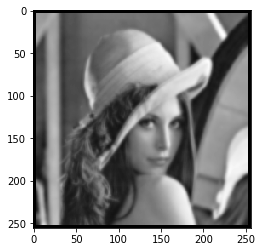

--------Normalized Image after GX operation--------


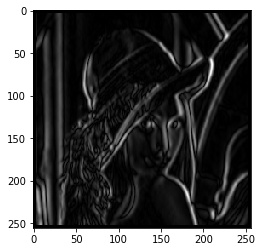

--------Normalized Image after GY operation--------


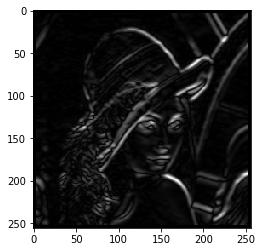

--------Normalized Magnitude Image after Prewitt operation--------


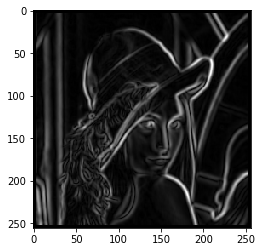

--------Normalized Image after Non-Maxima Suppression--------


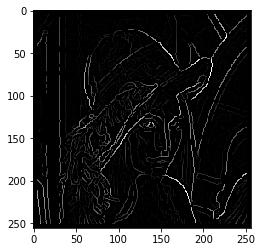

--------Binary edge Image after thresholding with ptile = 10 --------


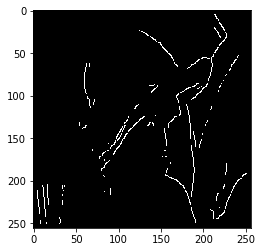

THRESHOLD FOR PTILE 10 IS 30
NUMBER OF EDGE POINTS FOR PTILE 10 ARE 1358

--------Binary edge Image after thresholding with ptile = 30 --------


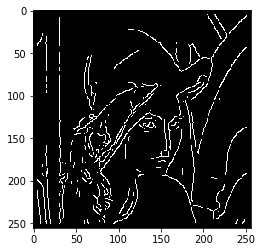

THRESHOLD FOR PTILE 30 IS 14
NUMBER OF EDGE POINTS FOR PTILE 30 ARE 3836

--------Binary edge Image after thresholding with ptile = 50 --------


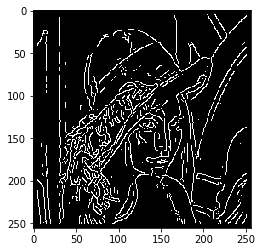

THRESHOLD FOR PTILE 50 IS 6
NUMBER OF EDGE POINTS FOR PTILE 50 ARE 6365



In [56]:
if __name__=="__main__":
    main()